In [2]:
!pip install mkl

In [3]:
import os
os.environ["MKL_THREADING_LAYER"] = "GNU"

In [4]:
import pandas as pd
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [5]:
position_data = pd.read_csv('location_data_hw8_2022.csv')
print(position_data)

              t  red_pos_X  red_pos_Y  blue_pos_X  blue_pos_Y
0      1.718397   1.330174   0.993564    1.081700   -1.295918
1      2.998056   1.310404   1.012772    1.004997   -1.254394
2      6.015073   1.270312   1.028386    1.113696   -1.321257
3      8.267651   1.331131   0.948223    1.001845   -1.285209
4      9.279321   1.346159   0.963485    1.113008   -1.261147
..          ...        ...        ...         ...         ...
233  917.257513   1.508631  -1.102589    1.336283    0.731539
234  918.731229   1.527784  -1.089354    1.365426    0.704495
235  920.799970   1.548625  -1.114348    1.274398    0.851536
236  935.253542   1.546141  -1.122522    1.375008    0.789581
237  943.819854   1.519060  -1.131294    1.381119    0.873799

[238 rows x 5 columns]


Data visualization

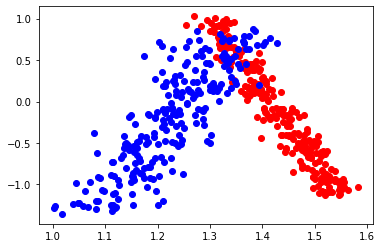

In [6]:
plt.scatter(position_data['red_pos_X'], position_data['red_pos_Y'], color='red')
plt.scatter(position_data['blue_pos_X'], position_data['blue_pos_Y'], color='blue')

(array([21., 19., 21., 30., 19., 29., 26., 23., 26., 24.]),
 array([-1.35580515, -1.13284472, -0.90988428, -0.68692384, -0.4639634 ,
        -0.24100297, -0.01804253,  0.20491791,  0.42787835,  0.65083879,
         0.87379922]),
 <BarContainer object of 10 artists>)

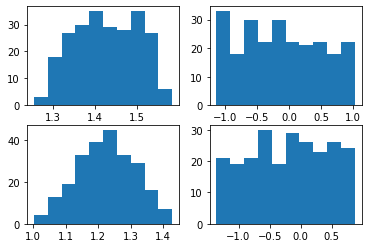

In [7]:
#Xs are gaussianly distributed and Ys are uniformly distributed
fig, axs = plt.subplots(2,2)
axs[0,0].hist(position_data['red_pos_X'])
axs[0,1].hist(position_data['red_pos_Y'])
axs[1,0].hist(position_data['blue_pos_X'])
axs[1,1].hist(position_data['blue_pos_Y'])

# Use PyMC and Bayesian inference to answer the following questions:

# a) What is the posterior of the speed of each object?

We will consider everything to be normally distributed...

We assume a posterior of the form $p( \text{speed}| \text{data}) \approx p(\text{data}|\text{speed}) p(\text{speed})$

In [33]:
t = position_data['t'].to_numpy()
red_pos_X = position_data['red_pos_X'].to_numpy()
red_pos_Y = position_data['red_pos_Y'].to_numpy()
blue_pos_X = position_data['blue_pos_X'].to_numpy()
blue_pos_Y = position_data['blue_pos_Y'].to_numpy()

In [34]:
delta_t = t[1::2] - t[0::2]
red_speed_X = (np.abs(red_pos_X[1::2] - red_pos_X[0::2]))/delta_t
red_speed_Y = (np.abs(red_pos_Y[1::2] - red_pos_Y[0::2]))/delta_t
blue_speed_X = (np.abs(blue_pos_X[1::2] - blue_pos_X[0::2]))/delta_t
blue_speed_Y = (np.abs(blue_pos_Y[1::2] - blue_pos_Y[0::2]))/delta_t


In [35]:
red_speed = np.sqrt(red_speed_X**2 + red_speed_Y**2)
blue_speed = np.sqrt(blue_speed_X**2 + blue_speed_Y**2)


(array([51., 32., 13., 14.,  4.,  1.,  1.,  2.,  0.,  1.]),
 array([4.01130991e-05, 1.64795603e-02, 3.29190076e-02, 4.93584548e-02,
        6.57979021e-02, 8.22373493e-02, 9.86767966e-02, 1.15116244e-01,
        1.31555691e-01, 1.47995138e-01, 1.64434586e-01]),
 <BarContainer object of 10 artists>)

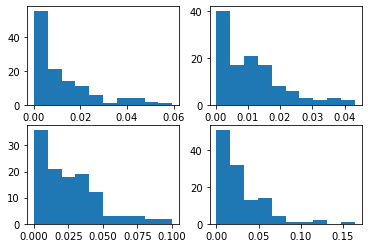

In [9]:
fig, axs = plt.subplots(2,2)
axs[0,0].hist(red_speed_X)
axs[0,1].hist(red_speed_Y)
axs[1,0].hist(blue_speed_X)
axs[1,1].hist(blue_speed_Y)

For red_speed_X, red_speed_Y, blue_speed_X, blue_speed_Y:

In [134]:
with pm.Model() as model:
#    Prior normal distribution
#     s = pm.Exponential('s', lam = 1)
    s = pm.Normal('s', mu=0, sigma=1)
#    Likelihood also normal distribution
    x_s = pm.Normal('x_s', s, observed = red_speed_X)
    
    trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


<AxesSubplot:title={'center':'s'}>

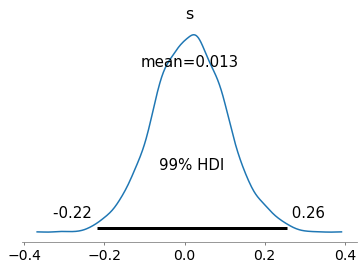

In [135]:
az.plot_posterior(trace, hdi_prob=0.99)

In [132]:
with pm.Model() as model:
#    Prior normal distribution
#     s = pm.Exponential('s', lam = 1)
    s = pm.Normal('s', mu=0, sigma=1)
#    Likelihood also normal distribution
    x_s = pm.Normal('x_s', s, observed = red_speed_Y)
    
    trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


<AxesSubplot:title={'center':'s'}>

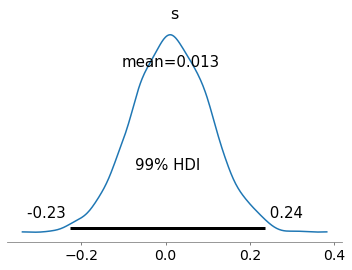

In [133]:
az.plot_posterior(trace, hdi_prob=0.99)

In [130]:
with pm.Model() as model:
#    Prior normal distribution
#     s = pm.Exponential('s', lam = 1)
    s = pm.Normal('s', mu=0, sigma=1)
#    Likelihood also normal distribution
    x_s = pm.Normal('x_s', s, observed = blue_speed_X)
    
    trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


<AxesSubplot:title={'center':'s'}>

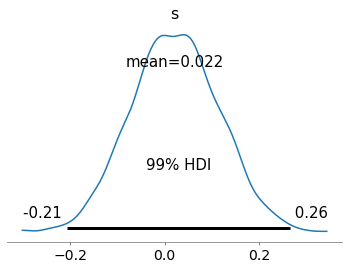

In [131]:
az.plot_posterior(trace, hdi_prob=0.99)

In [128]:
with pm.Model() as model:
#    Prior normal distribution
#     s = pm.Exponential('s', lam = 1)
    s = pm.Normal('s', mu=0, sigma=1)
#    Likelihood also normal distribution
    x_s = pm.Normal('x_s', s, observed = blue_speed_Y)
    
    trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


<AxesSubplot:title={'center':'s'}>

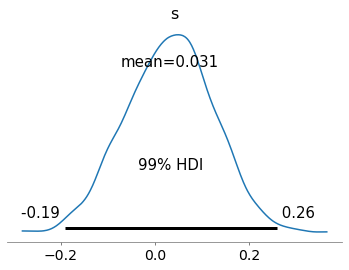

In [129]:
az.plot_posterior(trace, hdi_prob=0.99)

Abusing probability, $v_{red} = \sqrt{v_{red_x}^2 + v_{red_y}^2} = 0.018 $ and $v_{blue} = \sqrt{v_{blue_x}^2 + v_{blue_y}^2} = 0.038 $ where we use the sampled posterior means for $v_{red_x}, v_{red_y}, v_{blue_x}, v_{blue_y}$. 

# b) What is the 5% and 95% confidence interval of the time range when the true Y value of the Blue object is => 0 AND the true Y value of Red <=0? That is, what are the 5% and 95% quantiles of the estimated first time when Y_blue >= 0 and Y_red <= 0?

I don't know anything about frequentist statistics.

# c) If both objects are known to be moving at the same speed, how does you answer in a and b change? That is, that the total magnitude of the velocity (sqrt[$v_x^2 + v_y^2$]) is the same for each object.

In a) we sampled the posterior for the speed in each direction($v_x, v_y$) and each color(red,blue) individually. It probably makes more sense to sample the posterior of the speed for each color instead, i.e., $v = \sqrt{v_x^2 +v_y^2}$. In the case that the two objects have the same underlying speed, then our datapoints will have doubled and we should have a more accurate estimate of $v$. Again, we will sample the posterior and use the mean as the estimate for $v$.

(array([19., 10.,  6.,  7.,  2.,  1.,  4.,  0.,  0.,  1.]),
 array([0.00138525, 0.00805972, 0.01473418, 0.02140864, 0.02808311,
        0.03475757, 0.04143203, 0.0481065 , 0.05478096, 0.06145543,
        0.06812989]),
 <BarContainer object of 10 artists>)

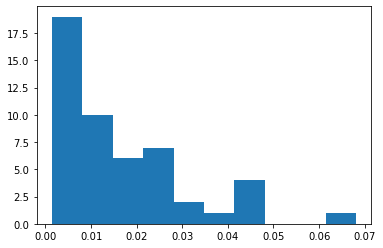

In [25]:
plt.hist(red_speed)

(array([11., 13.,  9., 10.,  3.,  0.,  1.,  0.,  1.,  2.]),
 array([0.0020343 , 0.01604606, 0.03005782, 0.04406959, 0.05808135,
        0.07209311, 0.08610488, 0.10011664, 0.1141284 , 0.12814017,
        0.14215193]),
 <BarContainer object of 10 artists>)

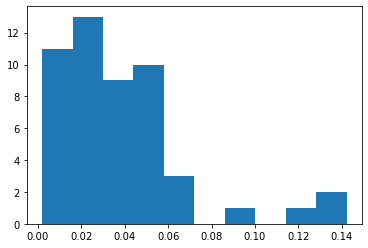

In [26]:
plt.hist(blue_speed)

In [36]:
speeds = np.concatenate((blue_speed, red_speed))

In [39]:
with pm.Model() as model:
#    Prior normal distribution
#     s = pm.Exponential('s', lam = 1)
    s = pm.Normal('s', mu=0, sigma=1)
#    Likelihood also normal distribution
    x_s = pm.Normal('x_s', s, observed = speeds)
    
    trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


<AxesSubplot:title={'center':'s'}>

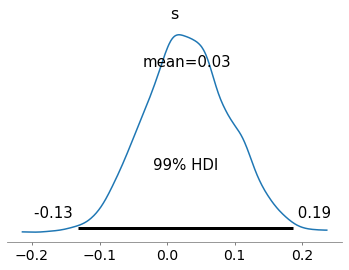

In [40]:
az.plot_posterior(trace, hdi_prob=0.99)

# d) Repeat your answers for a-c by using only the first 100 measurements? Do the changes make sense?

In [42]:
delta_t = t[1:100:2] - t[0:100:2]
red_speed_X = (np.abs(red_pos_X[1:100:2] - red_pos_X[0:100:2]))/delta_t
red_speed_Y = (np.abs(red_pos_Y[1:100:2] - red_pos_Y[0:100:2]))/delta_t
blue_speed_X = (np.abs(blue_pos_X[1:100:2] - blue_pos_X[0:100:2]))/delta_t
blue_speed_Y = (np.abs(blue_pos_Y[1:100:2] - blue_pos_Y[0:100:2]))/delta_t


In [43]:
red_speed = np.sqrt(red_speed_X**2 + red_speed_Y**2)
blue_speed = np.sqrt(blue_speed_X**2 + blue_speed_Y**2)


(array([17., 14., 10.,  5.,  1.,  0.,  0.,  1.,  0.,  2.]),
 array([4.01130991e-05, 1.28660906e-02, 2.56920680e-02, 3.85180455e-02,
        5.13440230e-02, 6.41700004e-02, 7.69959779e-02, 8.98219554e-02,
        1.02647933e-01, 1.15473910e-01, 1.28299888e-01]),
 <BarContainer object of 10 artists>)

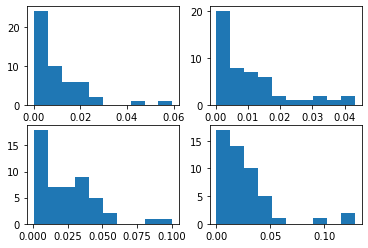

In [16]:
fig, axs = plt.subplots(2,2)
axs[0,0].hist(red_speed_X)
axs[0,1].hist(red_speed_Y)
axs[1,0].hist(blue_speed_X)
axs[1,1].hist(blue_speed_Y)

For red_speed_X, red_speed_Y, blue_speed_X, blue_speed_Y:

In [17]:
with pm.Model() as model:
#    Prior normal distribution
#     s = pm.Exponential('s', lam = 1)
    s = pm.Normal('s', mu=0, sigma=1)
#    Likelihood also normal distribution
    x_s = pm.Normal('x_s', s, observed = red_speed_X)
    
    trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


<AxesSubplot:title={'center':'s'}>

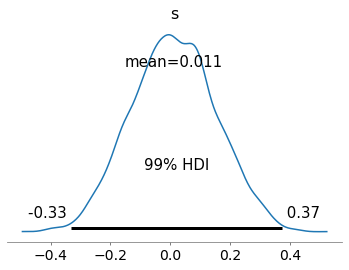

In [18]:
az.plot_posterior(trace, hdi_prob=0.99)

In [19]:
with pm.Model() as model:
#    Prior normal distribution
#     s = pm.Exponential('s', lam = 1)
    s = pm.Normal('s', mu=0, sigma=1)
#    Likelihood also normal distribution
    x_s = pm.Normal('x_s', s, observed = red_speed_Y)
    
    trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


<AxesSubplot:title={'center':'s'}>

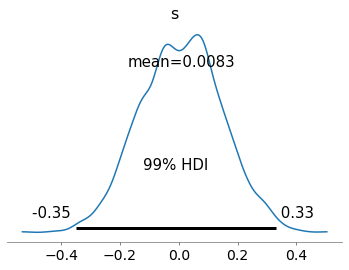

In [20]:
az.plot_posterior(trace, hdi_prob=0.99)

In [21]:
with pm.Model() as model:
#    Prior normal distribution
#     s = pm.Exponential('s', lam = 1)
    s = pm.Normal('s', mu=0, sigma=1)
#    Likelihood also normal distribution
    x_s = pm.Normal('x_s', s, observed = blue_speed_X)
    
    trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


<AxesSubplot:title={'center':'s'}>

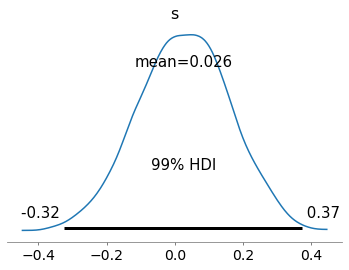

In [22]:
az.plot_posterior(trace, hdi_prob=0.99)

In [23]:
with pm.Model() as model:
#    Prior normal distribution
#     s = pm.Exponential('s', lam = 1)
    s = pm.Normal('s', mu=0, sigma=1)
#    Likelihood also normal distribution
    x_s = pm.Normal('x_s', s, observed = blue_speed_Y)
    
    trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


<AxesSubplot:title={'center':'s'}>

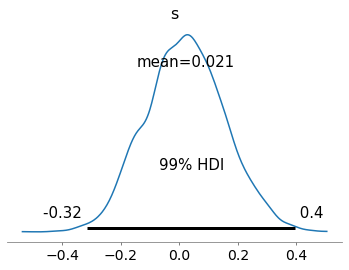

In [24]:
az.plot_posterior(trace, hdi_prob=0.99)

Abusing probability, $v_{red} = \sqrt{v_{red_x}^2 + v_{red_y}^2} = 0.013 $ and $v_{blue} = \sqrt{v_{blue_x}^2 + v_{blue_y}^2} = 0.033 $ where we use the sampled posterior means for $v_{red_x}, v_{red_y}, v_{blue_x}, v_{blue_y}$. 

### For C) with the first 100 datapoints

In [48]:
speeds = np.concatenate((blue_speed, red_speed))
print(len(speeds))

100


In [49]:
with pm.Model() as model:
#    Prior normal distribution
#     s = pm.Exponential('s', lam = 1)
    s = pm.Normal('s', mu=0, sigma=1)
#    Likelihood also normal distribution
    x_s = pm.Normal('x_s', s, observed = speeds)
    
    trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


<AxesSubplot:title={'center':'s'}>

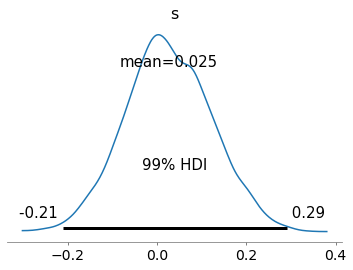

In [50]:
az.plot_posterior(trace, hdi_prob=0.99)